In [37]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [38]:
df = pd.read_excel('../data/gsw_box_score_team_stats.xlsx')

gsw_df = df[df['TEAM']=='GSW']
opponent_df = df[df['TEAM']!='GSW']

print(f'gsw_df.shape: {gsw_df.shape}\t\tgsw_df.TEAM.nunique(): {gsw_df.TEAM.nunique()}')
print(f'opponent_df.shape: {opponent_df.shape}\topponent_df.TEAM.nunique(): {opponent_df.TEAM.nunique()}')

gsw_df.shape: (67, 25)		gsw_df.TEAM.nunique(): 1
opponent_df.shape: (67, 25)	opponent_df.TEAM.nunique(): 29


In [39]:
JIMMY_TRADE = '2025-02-08'

gsw_df_pre_jimmy = gsw_df[gsw_df['DATE'] < JIMMY_TRADE]
gsw_df_with_jimmy = gsw_df[gsw_df['DATE'] >= JIMMY_TRADE]

opp_df_pre_jimmy = opponent_df[opponent_df['DATE'] < JIMMY_TRADE]
opp_df_with_jimmy = opponent_df[opponent_df['DATE'] >= JIMMY_TRADE]

In [40]:
gsw_pts_avg_with_jimmy = round(gsw_df_with_jimmy.PTS.mean(), 2)
gsw_pts_avg_pre_jimmy = round(gsw_df_pre_jimmy.PTS.mean(), 2)
print(f"GSW PTS AVG with Jimmy: {gsw_pts_avg_with_jimmy}; GSW PTS AVG before Jimmy: {gsw_pts_avg_pre_jimmy}")

opp_pts_avg_with_jimmy = round(opp_df_with_jimmy.PTS.mean(), 2)
opp_pts_avg_pre_jimmy = round(opp_df_pre_jimmy.PTS.mean(), 2)
print(f"Opponents PTS AVG with Jimmy: {opp_pts_avg_with_jimmy}; Opponents PTS AVG before Jimmy: {opp_pts_avg_pre_jimmy}")

GSW PTS AVG with Jimmy: 120.06; GSW PTS AVG before Jimmy: 111.51
Opponents PTS AVG with Jimmy: 107.75; Opponents PTS AVG before Jimmy: 111.92


In [41]:
avg_columns = [
    'FGM', 'FGA','3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB',
    'TREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-']

gsw_df_pre_jimmy_avg = pd.DataFrame(gsw_df_pre_jimmy[avg_columns].mean()).transpose()
gsw_df_with_jimmy_avg = pd.DataFrame(gsw_df_with_jimmy[avg_columns].mean()).transpose()

In [42]:
gsw_avg_combined_df = pd.concat([gsw_df_pre_jimmy_avg, gsw_df_with_jimmy_avg], axis=0)
gsw_avg_combined_df

,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,TREB,AST,STL,BLK,TOV,PF,PTS,+/-
0,40.705882,91.627451,15.411765,42.54902,14.686275,20.392157,12.607843,33.392157,46.0,28.607843,8.607843,4.980392,13.254902,19.568627,111.509804,-0.411765
0,41.937500,89.562500,15.125000,41.37500,21.062500,24.937500,12.937500,32.562500,45.5,31.250000,10.187500,5.000000,12.500000,19.125000,120.062500,12.312500


In [43]:
opp_df_pre_jimmy_avg = pd.DataFrame(opp_df_pre_jimmy[avg_columns].mean()).transpose()
opp_df_with_jimmy_avg = pd.DataFrame(opp_df_with_jimmy[avg_columns].mean()).transpose()

opp_avg_combined_df = pd.concat([opp_df_pre_jimmy_avg, opp_df_with_jimmy_avg], axis=0)
opp_avg_combined_df['Descr']=['before','after']

In [44]:
opp_avg_combined_df


,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,TREB,AST,STL,BLK,TOV,PF,PTS,+/-,Descr
0,40.803922,88.215686,13.352941,37.352941,16.960784,21.784314,10.54902,34.647059,45.196078,26.54902,7.54902,5.862745,13.72549,17.784314,111.921569,0.411765,before
0,39.375000,85.312500,12.437500,33.812500,16.562500,22.062500,10.75000,30.625000,41.375000,23.31250,7.25000,4.625000,17.06250,19.375000,107.750000,-12.312500,after


<Axes: xlabel='DATE'>

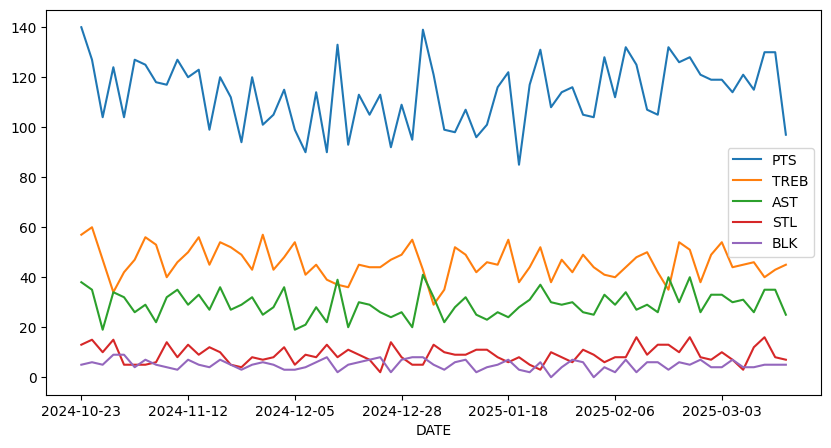

In [45]:
import numpy as np

# ts = pd.DataFrame(gsw_df_pre_jimmy.PTS, index=gsw_df_pre_jimmy.DATE)
# ts
ts = gsw_df#.cumsum()
ts.plot(y=['PTS','TREB', 'AST', 'STL', 'BLK'], x='DATE', kind='line', figsize=(10,5))

In [46]:
gsw_df[gsw_df['DATE'] >= JIMMY_TRADE]

,Unnamed: 0,TEAM,OPP,STATUS,DATE,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,TREB,AST,STL,BLK,TOV,PF,PTS,+/-
102,102,GSW,CHI,away,2025-02-08,240:00,45,90,0.500,19,48,0.396,23,27,0.852,16,28,44,34,8,7,14,23,132,21
104,104,GSW,MIL,away,2025-02-10,240:00,41,93,0.441,13,45,0.289,30,38,0.789,15,33,48,27,16,2,9,23,125,14
106,106,GSW,DAL,away,2025-02-12,240:00,41,96,0.427,10,35,0.286,15,18,0.833,18,32,50,29,9,6,15,16,107,-4
108,108,GSW,HOU,away,2025-02-13,240:00,35,89,0.393,11,41,0.268,24,27,0.889,9,33,42,26,13,6,10,18,105,7
110,110,GSW,SAC,away,2025-02-21,240:00,50,93,0.538,20,43,0.465,12,12,1.000,11,24,35,40,13,3,12,19,132,24
113,113,GSW,DAL,home,2025-02-23,240:00,47,98,0.480,12,40,0.300,20,23,0.870,17,37,54,30,10,6,10,17,126,24
115,115,GSW,CHA,home,2025-02-25,240:00,49,100,0.490,15,42,0.357,15,18,0.833,16,35,51,40,16,5,11,20,128,36
116,116,GSW,ORL,away,2025-02-27,240:00,36,79,0.456,19,45,0.422,30,34,0.882,11,27,38,26,8,7,12,18,121,6
118,118,GSW,PHI,away,2025-03-01,240:00,46,100,0.460,12,42,0.286,15,19,0.789,18,31,49,33,7,4,15,19,119,-7
120,120,GSW,CHA,away,2025-03-03,240:00,40,95,0.421,18,50,0.360,21,24,0.875,12,42,54,33,10,4,8,23,119,18


In [61]:
gsw_worst_3pm_games = gsw_df.sort_values('3PM').head(10).copy()
gsw_worst_3pm_games
gsw_worst_3pm_games_dates = gsw_worst_3pm_games.DATE.to_list()
print(f"GSW's average 3PM per game this season: {round(gsw_df['3PM'].mean(),2)}")
print("The following opponents have kept GSW's 3PM to their lowest for the season:")
# The 5 teams with best defense against GSW's 3-point shooting
# opponent_df[opponent_df['DATE'].isin(gsw_worst_3pm_games_dates)].sort_values()
gsw_df[gsw_df['DATE'].isin(gsw_worst_3pm_games_dates)][['TEAM', 'OPP', 'DATE', 'STATUS', '3PM']].sort_values('3PM', ascending=True)



GSW's average 3PM per game this season: 15.34
The following opponents have kept GSW's 3PM to their lowest for the season:


,TEAM,OPP,DATE,STATUS,3PM
58,GSW,LAC,2024-12-27,away,7
41,GSW,HOU,2024-12-05,home,9
63,GSW,CLE,2024-12-30,home,9
74,GSW,IND,2025-01-10,away,10
106,GSW,DAL,2025-02-12,away,10
43,GSW,MIN,2024-12-06,home,11
108,GSW,HOU,2025-02-13,away,11
38,GSW,DEN,2024-12-03,away,12
46,GSW,HOU,2024-12-11,away,12
12,GSW,WAS,2024-11-04,away,12
